In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('data/model_data.csv',index_col=0)
test = pd.read_csv('data/vali_data.csv',index_col=0)

In [3]:
test

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.000000,58,0,0.000481,2080.000000,4,0,0,0,0.000000
1,1,0.588870,44,0,0.198193,29373.217358,13,0,2,0,2.504880
2,0,0.057460,64,0,0.021830,6000.000000,4,0,0,0,0.000000
3,0,0.011585,52,0,0.139685,5583.000000,8,0,1,0,0.000000
4,1,0.663034,53,0,0.399663,4800.000000,12,0,0,0,0.201706
...,...,...,...,...,...,...,...,...,...,...,...
83571,1,1.108158,46,0,9.065413,1840.411542,1,0,0,0,0.097132
83572,1,0.865386,40,2,0.460507,3900.000000,11,0,0,0,4.592942
83573,1,0.876731,41,0,0.115744,6116.265023,3,0,0,0,2.132511
83574,1,0.966116,41,1,0.113281,3800.000000,3,3,0,0,3.000000


In [4]:
train['qcut'],updown = pd.qcut(train['age'],retbins=True,q=20)

In [5]:
count_y0 = train[train['SeriousDlqin2yrs'] == 0].groupby(by='qcut').count()['SeriousDlqin2yrs']
count_y1 = train[train['SeriousDlqin2yrs'] == 1].groupby(by='qcut').count()['SeriousDlqin2yrs']


In [6]:
count_y1

qcut
(20.999, 28.0]    7541
(28.0, 31.0]      5952
(31.0, 34.0]      6771
(34.0, 36.0]      4590
(36.0, 39.0]      7490
(39.0, 41.0]      5831
(41.0, 43.0]      5688
(43.0, 45.0]      5924
(45.0, 46.0]      3238
(46.0, 48.0]      6133
(48.0, 50.0]      6245
(50.0, 52.0]      5789
(52.0, 54.0]      5073
(54.0, 56.0]      4017
(56.0, 58.0]      3417
(58.0, 61.0]      4819
(61.0, 64.0]      3228
(64.0, 68.0]      2268
(68.0, 74.0]      1912
(74.0, 107.0]     1391
Name: SeriousDlqin2yrs, dtype: int64

In [23]:
#num_bins值分别为每个区间的上界，下界，0出现的次数，1出现的次数
num_bins = [*zip(updown,updown[1:],count_y0,count_y1)]
#注意zip会按照最短列来进行结合
num_bins

[(21.0, 28.0, 4243, 7541),
 (28.0, 31.0, 3571, 5952),
 (31.0, 34.0, 4075, 6771),
 (34.0, 36.0, 2908, 4590),
 (36.0, 39.0, 5182, 7490),
 (39.0, 41.0, 3956, 5831),
 (41.0, 43.0, 4002, 5688),
 (43.0, 45.0, 4389, 5924),
 (45.0, 46.0, 2419, 3238),
 (46.0, 48.0, 4813, 6133),
 (48.0, 50.0, 4900, 6245),
 (50.0, 52.0, 4728, 5789),
 (52.0, 54.0, 4681, 5073),
 (54.0, 56.0, 4677, 4017),
 (56.0, 58.0, 4483, 3417),
 (58.0, 61.0, 6583, 4819),
 (61.0, 64.0, 6968, 3228),
 (64.0, 68.0, 6623, 2268),
 (68.0, 74.0, 6753, 1912),
 (74.0, 107.0, 7737, 1391)]

In [8]:
def get_woe(num_bins):
    # 通过 num_bins 数据计算 woe
    columns = ["min","max","count_0","count_1"]
    df = pd.DataFrame(num_bins,columns=columns)
    df["total"] = df.count_0 + df.count_1
    df["percentage"] = df.total / df.total.sum()
    df["bad_rate"] = df.count_1 / df.total
    df["good%"] = df.count_0/df.count_0.sum()
    df["bad%"] = df.count_1/df.count_1.sum()
    df["woe"] = np.log(df["good%"] / df["bad%"])
    return df
#计算IV值
def get_iv(df):
    rate = df["good%"] - df["bad%"]
    iv = np.sum(rate * df.woe)
    return iv

In [9]:
colunms =  ['min','max','count_y0','count_y1']

In [10]:
df = pd.DataFrame(num_bins,columns=colunms)

In [11]:
df

,min,max,count_y0,count_y1
0,21.0,28.0,4243,7541
1,28.0,31.0,3571,5952
2,31.0,34.0,4075,6771
3,34.0,36.0,2908,4590
4,36.0,39.0,5182,7490
5,39.0,41.0,3956,5831
6,41.0,43.0,4002,5688
7,43.0,45.0,4389,5924
8,45.0,46.0,2419,3238
9,46.0,48.0,4813,6133


In [12]:
df = get_woe(num_bins)

In [13]:
df

,min,max,count_0,count_1,total,percentage,bad_rate,good%,bad%,woe
0,21.0,28.0,4243,7541,11784,0.060428,0.639936,0.043433,0.077489,-0.578920
1,28.0,31.0,3571,5952,9523,0.048834,0.625013,0.036554,0.061161,-0.514717
2,31.0,34.0,4075,6771,10846,0.055618,0.624285,0.041713,0.069577,-0.511614
3,34.0,36.0,2908,4590,7498,0.038450,0.612163,0.029767,0.047165,-0.460250
4,36.0,39.0,5182,7490,12672,0.064982,0.591067,0.053045,0.076965,-0.372213
5,39.0,41.0,3956,5831,9787,0.050188,0.595790,0.040495,0.059918,-0.391791
6,41.0,43.0,4002,5688,9690,0.049690,0.586997,0.040966,0.058448,-0.355400
7,43.0,45.0,4389,5924,10313,0.052885,0.574421,0.044927,0.060873,-0.303746
8,45.0,46.0,2419,3238,5657,0.029009,0.572388,0.024762,0.033273,-0.295437
9,46.0,48.0,4813,6133,10946,0.056131,0.560296,0.049268,0.063021,-0.246199


In [14]:
get_iv(df)

0.3536714620528218

In [15]:
from scipy import stats

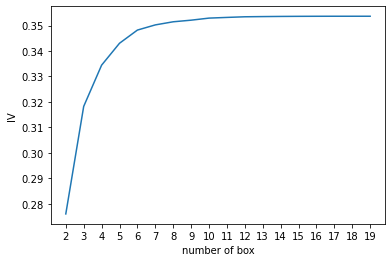

In [24]:
num_bins_ = num_bins.copy()
import matplotlib.pyplot as plt

IV = []
axisx = []
while len(num_bins_) > 2:
    pvs = []
    # 获取 num_bins_两两之间的卡方检验的置信度（或卡方值）
    for i in range(len(num_bins_)-1):
        x1 = num_bins_[i][2:]
        x2 = num_bins_[i+1][2:]
        # 0 返回 chi2 值，1 返回 p 值。
        pv = stats.chi2_contingency([x1,x2])[1]
        # chi2 = scipy.stats.chi2_contingency([x1,x2])[0]
        pvs.append(pv)
    # 通过 p 值进行处理。合并 p 值最大的两组
    i = pvs.index(max(pvs))
    num_bins_[i:i+2] = [(
        num_bins_[i][0],
        num_bins_[i+1][1],
        num_bins_[i][2]+num_bins_[i+1][2],
        num_bins_[i][3]+num_bins_[i+1][3])]
    bins_df = get_woe(num_bins_)
    axisx.append(len(num_bins_))
    IV.append(get_iv(bins_df))
plt.figure()
plt.plot(axisx,IV)
plt.xticks(axisx)
plt.xlabel("number of box")
plt.ylabel("IV")
plt.show()

In [30]:
def get_bin(num_bins_,n):
    while len(num_bins_) > n:
        pvs = []
        for i in range(len(num_bins_)-1):
            x1 = num_bins_[i][2:]
            x2 = num_bins_[i+1][2:]
            pv = stats.chi2_contingency([x1,x2])[1]
            # chi2 = scipy.stats.chi2_contingency([x1,x2])[0]
            pvs.append(pv)
        i = pvs.index(max(pvs))
        num_bins_[i:i+2] = [(
            num_bins_[i][0],
            num_bins_[i+1][1],
            num_bins_[i][2]+num_bins_[i+1][2],
            num_bins_[i][3]+num_bins_[i+1][3])]
    return num_bins_
afterbins = get_bin(num_bins,6)
afterbins
bins_df = get_woe(afterbins)
bins_df

,min,max,count_0,count_1,total,percentage,bad_rate,good%,bad%,woe
0,21.0,43.0,27937,43863,71800,0.368190,0.610905,0.285973,0.450723,-0.454955
1,43.0,54.0,25930,32402,58332,0.299126,0.555476,0.265429,0.332953,-0.226655
2,54.0,61.0,15743,12253,27996,0.143563,0.437670,0.161151,0.125908,0.246789
3,61.0,74.0,20344,7408,27752,0.142312,0.266936,0.208248,0.076122,1.006390
4,74.0,107.0,7737,1391,9128,0.046808,0.152388,0.079199,0.014293,1.712155


In [31]:
def graphforbestbin(DF, X, Y, n=5,q=20,graph=True):
    """
    自动最优分箱函数，基于卡方检验的分箱
    参数：
    DF: 需要输入的数据
    X: 需要分箱的列名
    Y: 分箱数据对应的标签 Y 列名
    n: 保留分箱个数
    q: 初始分箱的个数
    graph: 是否要画出IV图像
    区间为前开后闭 (]
    """ 
  
    DF = DF[[X,Y]].copy()
    DF["qcut"],bins = pd.qcut(DF[X], retbins=True, q=q,duplicates="drop")
    coount_y0 = DF.loc[DF[Y]==0].groupby(by="qcut").count()[Y]
    coount_y1 = DF.loc[DF[Y]==1].groupby(by="qcut").count()[Y]
    num_bins = [*zip(bins,bins[1:],coount_y0,coount_y1)]
    for i in range(q):
        if 0 in num_bins[0][2:]:
            num_bins[0:2] = [(
                num_bins[0][0],
                num_bins[1][1],
                num_bins[0][2]+num_bins[1][2],
                num_bins[0][3]+num_bins[1][3])]
            continue
            
        for i in range(len(num_bins)):
            if 0 in num_bins[i][2:]:
                num_bins[i-1:i+1] = [(
                    num_bins[i-1][0],
                    num_bins[i][1],
                    num_bins[i-1][2]+num_bins[i][2],
                    num_bins[i-1][3]+num_bins[i][3])]
                break
        else:
            break
    def get_woe(num_bins):
        columns = ["min","max","count_0","count_1"]
        df = pd.DataFrame(num_bins,columns=columns)
        df["total"] = df.count_0 + df.count_1
        df["percentage"] = df.total / df.total.sum()
        df["bad_rate"] = df.count_1 / df.total
        df["good%"] = df.count_0/df.count_0.sum()
        df["bad%"] = df.count_1/df.count_1.sum()
        df["woe"] = np.log(df["good%"] / df["bad%"])
        return df
    def get_iv(df):
        rate = df["good%"] - df["bad%"]
        iv = np.sum(rate * df.woe)
        return iv
    IV = []
    axisx = []
    while len(num_bins) > n:
        pvs = []
        for i in range(len(num_bins)-1):
            x1 = num_bins[i][2:]
            x2 = num_bins[i+1][2:]
            pv = stats.chi2_contingency([x1,x2])[1]
            pvs.append(pv)
        i = pvs.index(max(pvs))
        num_bins[i:i+2] = [(
            num_bins[i][0],
            num_bins[i+1][1],
            num_bins[i][2]+num_bins[i+1][2],
            num_bins[i][3]+num_bins[i+1][3])]
        bins_df = pd.DataFrame(get_woe(num_bins))
        axisx.append(len(num_bins))
        IV.append(get_iv(bins_df))
    if graph:
        plt.figure()
        plt.plot(axisx,IV) 
        plt.xticks(axisx)
        plt.xlabel("number of box")
        plt.ylabel("IV")
        plt.show() 
    return bins_df

RevolvingUtilizationOfUnsecuredLines


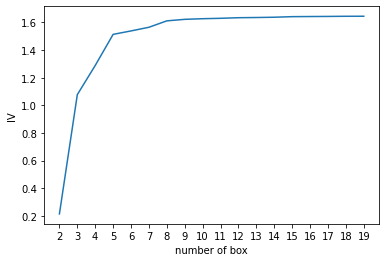

age


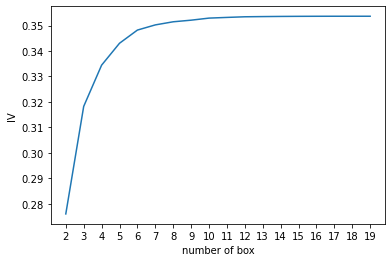

NumberOfTime30-59DaysPastDueNotWorse


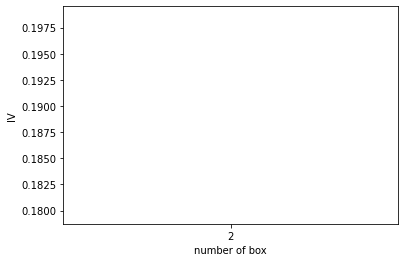

DebtRatio


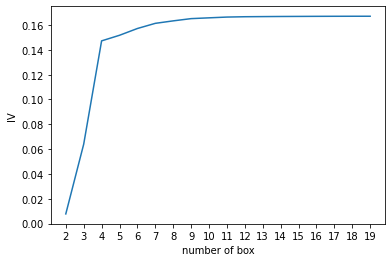

MonthlyIncome


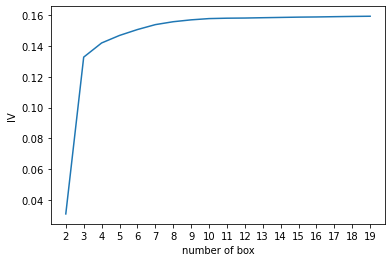

NumberOfOpenCreditLinesAndLoans


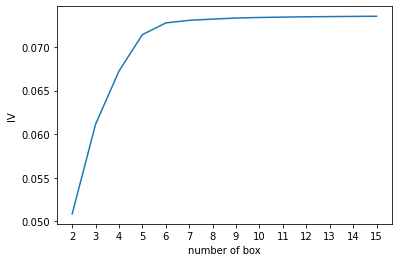

NumberOfTimes90DaysLate


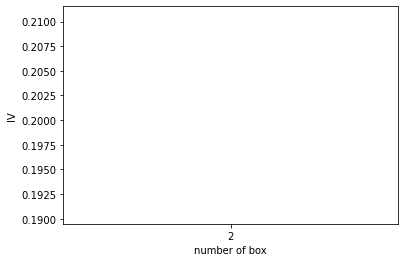

NumberRealEstateLoansOrLines


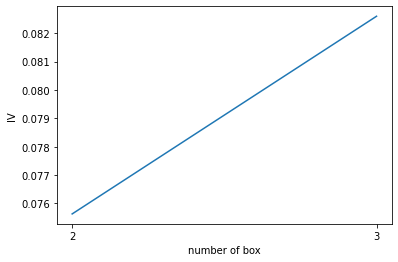

NumberOfTime60-89DaysPastDueNotWorse


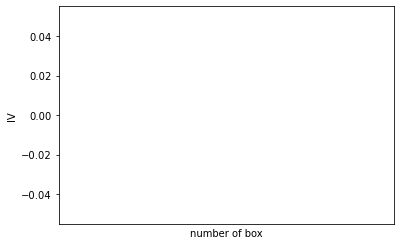

UnboundLocalError: local variable 'bins_df' referenced before assignment

In [33]:
train = pd.read_csv('data/model_data.csv',index_col=0)

train.columns
for i in train.columns[1:-1]:
    print(i)
    graphforbestbin(train,i,"SeriousDlqin2yrs",n=2,q=20)

In [38]:
auto_col_bins = {"RevolvingUtilizationOfUnsecuredLines":6,
                 "age":5,
                 "DebtRatio":4,
                 "MonthlyIncome":3,
                 "NumberOfOpenCreditLinesAndLoans":5} #不能使用自动分箱的变量
hand_bins = {"NumberOfTime30-59DaysPastDueNotWorse":[0,1,2,13]
             ,"NumberOfTimes90DaysLate":[0,1,2,17]
             ,"NumberRealEstateLoansOrLines":[0,1,2,4,54]
             ,"NumberOfTime60-89DaysPastDueNotWorse":[0,1,2,8]
             ,"NumberOfDependents":[0,1,2,3]}

#保证区间覆盖使用 np.inf替换最大值，用-np.inf替换最小值
hand_bins = {k:[-np.inf,*v[:-1],np.inf] for k,v in hand_bins.items()}

{'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf]}

In [35]:
bins_of_col = {}
# 生成自动分箱的分箱区间和分箱后的 IV 值
for col in auto_col_bins:
    bins_df = graphforbestbin(train,col
                            ,"SeriousDlqin2yrs"
                            ,n=auto_col_bins[col]
                            #使用字典的性质来取出每个特征所对应的箱的数量
                            ,q=20
                            ,graph=False)
    bins_list = sorted(set(   bins_df["min"]).union(bins_df["max"]))
    #保证区间覆盖使用 np.inf 替换最大值 -np.inf 替换最小值
    bins_list[0],bins_list[-1] = -np.inf,np.inf
    bins_of_col[col] = bins_list

In [36]:
#合并手动分箱数据    
bins_of_col.update(hand_bins)
bins_of_col

{'RevolvingUtilizationOfUnsecuredLines': [-inf,
  0.09913369101039332,
  0.29771237580000004,
  0.46512181500000005,
  0.9823265774799117,
  0.9999999,
  inf],
 'age': [-inf, 43.0, 54.0, 61.0, 74.0, inf],
 'DebtRatio': [-inf,
  0.0173354773,
  0.40168259367787085,
  1.4676877540732731,
  inf],
 'MonthlyIncome': [-inf, 0.1, 6175.0, inf],
 'NumberOfOpenCreditLinesAndLoans': [-inf, 1.0, 3.0, 5.0, 17.0, inf],
 'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf]}

In [37]:
data = train.copy()
#函数pd.cut，可以根据已知的分箱间隔把数据分箱
#参数为 pd.cut(数据，以列表表示的分箱间隔)
data = data[["age","SeriousDlqin2yrs"]].copy()
data["cut"] = pd.cut(data["age"],[-np.inf, 48.49986200790144, 58.757170160044694, 64.0, 74.0, np.inf])
data
#将数据按分箱结果聚合，并取出其中的标签值
data.groupby("cut")["SeriousDlqin2yrs"].value_counts()
#使用unstack()来将树状结构变成表状结构
data.groupby("cut")["SeriousDlqin2yrs"].value_counts().unstack()
bins_df = data.groupby("cut")["SeriousDlqin2yrs"].value_counts().unstack()
bins_df["woe"] = np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))


In [40]:
def get_woe(df,col,y,bins):
    df = df[[col,y]].copy()
    df["cut"] = pd.cut(df[col],bins)
    bins_df = df.groupby("cut")[y].value_counts().unstack()
    woe = bins_df["woe"] = np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))
    return woe
#将所有特征的WOE存储到字典当中
woeall = {}
for col in bins_of_col:
    woeall[col] = get_woe(train,col,"SeriousDlqin2yrs",bins_of_col[col])
woeall

{'RevolvingUtilizationOfUnsecuredLines': cut
 (-inf, 0.0991]     2.205573
 (0.0991, 0.298]    0.664237
 (0.298, 0.465]    -0.124694
 (0.465, 0.982]    -1.073972
 (0.982, 1.0]      -0.481611
 (1.0, inf]        -2.030498
 dtype: float64,
 'age': cut
 (-inf, 43.0]   -0.454955
 (43.0, 54.0]   -0.226655
 (54.0, 61.0]    0.246789
 (61.0, 74.0]    1.006390
 (74.0, inf]     1.712155
 dtype: float64,
 'DebtRatio': cut
 (-inf, 0.0173]     1.503630
 (0.0173, 0.402]    0.036943
 (0.402, 1.468]    -0.389100
 (1.468, inf]       0.176230
 dtype: float64,
 'MonthlyIncome': cut
 (-inf, 0.1]      1.360625
 (0.1, 6175.0]   -0.216010
 (6175.0, inf]    0.270257
 dtype: float64,
 'NumberOfOpenCreditLinesAndLoans': cut
 (-inf, 1.0]   -0.846195
 (1.0, 3.0]    -0.327940
 (3.0, 5.0]    -0.054617
 (5.0, 17.0]    0.123186
 (17.0, inf]    0.463719
 dtype: float64,
 'NumberOfTime30-59DaysPastDueNotWorse': cut
 (-inf, 0.0]    0.352626
 (0.0, 1.0]    -0.872120
 (1.0, 2.0]    -1.374281
 (2.0, inf]    -1.549127
 dtype:

In [41]:
#不希望覆盖掉原本的数据，创建一个新的DataFrame，索引和原始数据model_data一模一样
model_woe = pd.DataFrame(index=train.index) #将原数据分箱后，按箱的结果把WOE结构用map函数映射到数据中
model_woe["age"] = pd.cut(train["age"],bins_of_col["age"]).map(woeall["age"])
#对所有特征操作可以写成：
for col in bins_of_col:
    model_woe[col] = pd.cut(train[col],bins_of_col[col]).map(woeall[col])
#将标签补充到数据中
model_woe["SeriousDlqin2yrs"] = train["SeriousDlqin2yrs"] #这就是我们的建模数据了
model_woe.head()

,age,RevolvingUtilizationOfUnsecuredLines,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,-0.226655,2.205573,0.036943,-0.216010,-0.054617,0.352626,0.235686,-0.392551,0.124993,0.662384,0
1,1.006390,0.664237,0.036943,-0.216010,-0.054617,0.352626,0.235686,-0.392551,0.124993,0.662384,0
2,-0.454955,-2.030498,-0.389100,-0.216010,-0.054617,-0.872120,-1.758180,-0.392551,-1.772045,-0.478969,1
3,1.006390,2.205573,-0.389100,-0.216010,0.123186,0.352626,0.235686,0.618397,0.124993,0.662384,0
4,-0.226655,-1.073972,-0.389100,0.270257,0.123186,0.352626,0.235686,0.618397,0.124993,-0.513966,1


In [42]:
#处理测试集
vali_woe = pd.DataFrame(index=test.index)
for col in bins_of_col:
    vali_woe[col] = pd.cut(test[col],bins_of_col[col]).map(woeall[col])
vali_woe["SeriousDlqin2yrs"] = test["SeriousDlqin2yrs"]
vali_X = vali_woe.iloc[:,:-1]
vali_y = vali_woe.iloc[:,-1]

In [44]:
X = model_woe.iloc[:,:-1] 
y = model_woe.iloc[:,-1]
from sklearn.linear_model import LogisticRegression as LR
lr = LR().fit(X,y)
lr.score(vali_X,vali_y)

d:\ProgramData\Anaconda3\envs\learn-ml\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


0.7739901407102517

In [46]:
c_1 = np.linspace(0.01,1,20)
c_2 = np.linspace(0.01,0.2,20)

d:\ProgramData\Anaconda3\envs\learn-ml\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
d:\ProgramData\Anaconda3\envs\learn-ml\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
d:\ProgramData\Anaconda3\envs\learn-ml\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
d:\ProgramData\Anaconda3\envs\learn-ml\lib\site-packages\sklearn\base.py:493

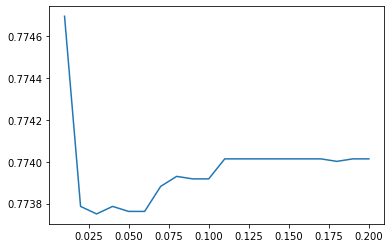

d:\ProgramData\Anaconda3\envs\learn-ml\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
d:\ProgramData\Anaconda3\envs\learn-ml\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
d:\ProgramData\Anaconda3\envs\learn-ml\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
d:\ProgramData\Anaconda3\envs\learn-ml\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
d:

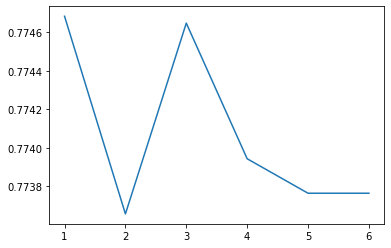

In [47]:
score = []
for i in c_2: 
    lr = LR(solver='liblinear',C=i).fit(X,y)
    score.append(lr.score(vali_X,vali_y))
plt.figure()
plt.plot(c_2,score)
plt.show()
lr.n_iter_
score = []
for i in [1,2,3,4,5,6]: 
    lr = LR(solver='liblinear',C=0.025,max_iter=i).fit(X,y)
    score.append(lr.score(vali_X,vali_y))
plt.figure()
plt.plot([1,2,3,4,5,6],score)
plt.show()

d:\ProgramData\Anaconda3\envs\learn-ml\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

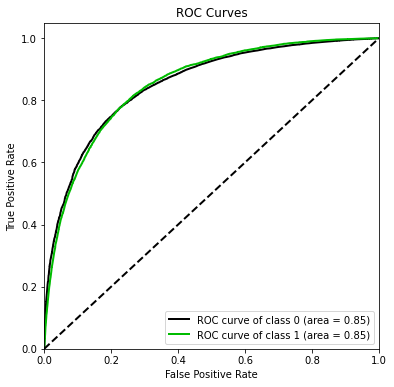

In [48]:
import scikitplot as skplt
#%%cmd
#pip install scikit-plot
vali_proba_df = pd.DataFrame(lr.predict_proba(vali_X))
skplt.metrics.plot_roc(vali_y, vali_proba_df,
                    plot_micro=False,figsize=(6,6),
                    plot_macro=False)